In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/RobotVision/Project
!ls

/content/drive/MyDrive/RobotVision/Project
sul_train.csv  sul_train_ver2.csv  미래예측.ipynb


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 321,921
Trainable params: 321,921
Non-trai

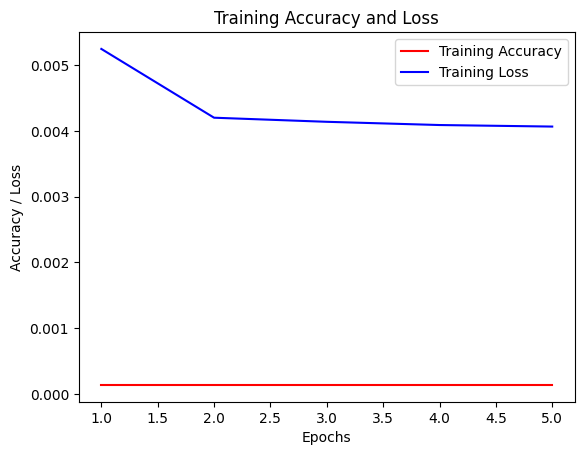

1/1 [==============================] - 0s 299ms/step
[[19.135426]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
import matplotlib.pyplot as plt


# 데이터 불러오기
df = pd.read_csv('sul_train.csv', encoding='cp949')
value = df['ti_value']

# NaN 값 보간
value = value.interpolate()

# 학습 데이터 구성
input_data = []
output_data = []

for i in range(7, len(df)):
    input_data.append([value[i-7], value[i-6], value[i-5], value[i-4], value[i-3], value[i-2], value[i-1]])
    output_data.append(value[i])


input_data = np.array(input_data)
output_data = np.array(output_data)

# 데이터 정규화
scaler_input = MinMaxScaler()
input_data = scaler_input.fit_transform(input_data.reshape(-1, 7))

scaler_output = MinMaxScaler()
output_data = scaler_output.fit_transform(output_data.reshape(-1, 1))

# RNN 모델 선택

model = Sequential()
model.add(LSTM(units=256, input_shape=(7, 1), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))  # Dropout 비율은 0.2로 설정 (20%의 뉴런을 비활성화)
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='linear'))


model.summary()ㅁ
# loss(손실) 값과 metrics(정확도) 값 설정
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


# 모델 학습
history = model.fit(input_data, output_data, epochs=5, batch_size=32, shuffle=True)

# 정확도 값 추출
accuracy = history.history['accuracy']

# 손실 값 추출
loss = history.history['loss']

# 그래프 그리기
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

# 예측 날짜 직접 지정
predict_date = '2022-10-21'

# 예측할 데이터 구성
predict_data = []
for i in range(7):
    predict_data.append(value[len(value) - 7 + i])
predict_data = np.array(predict_data)
predict_data = scaler_input.transform(predict_data.reshape(1, -1))

# 모델을 이용한 예측
future_output = model.predict(predict_data)
future_output = scaler_output.inverse_transform(future_output)
print(future_output)
